<a href="https://colab.research.google.com/github/ds4ph-bme/capstone-project-bbains31/blob/main/capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('/content/heart_disease_uci.csv')
df['num'] = df['num'].apply(lambda x: 1 if x != 0 else 0)

missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

df.head()

Missing values per column:
 id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,1
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [115]:
drop = ['slope','ca','id','thal']
df = df.drop(columns=drop)

chol_mean = df['chol'][df['chol'] != 0].mean()

# Replace zeroes with the mean
df['chol'] = df['chol'].replace(0, chol_mean)

df.head()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,num
0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,0
1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,1
2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,1
3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,0
4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,0


In [116]:
from sklearn.preprocessing import OneHotEncoder

scaler = StandardScaler()
encoder = OneHotEncoder()

features_to_scale = ['age','trestbps','chol','thalch','oldpeak']
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

features_to_encode = ['sex','dataset','cp','fbs','restecg','exang','num']
encoded_df = encoder.fit_transform(df[features_to_encode])
df = pd.concat([df,pd.DataFrame(encoded_df.toarray(),columns=encoder.get_feature_names_out())],axis=1)
df = df.drop(columns=features_to_encode)

StandardScaler()
df.head()


,age,trestbps,chol,thalch,oldpeak,sex_Female,sex_Male,dataset_Cleveland,dataset_Hungary,dataset_Switzerland,...,fbs_nan,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,restecg_nan,exang_False,exang_True,exang_nan,num_0,num_1
0,1.007386,0.675287,-0.263324,0.480653,1.303159,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1.432034,1.462483,0.745591,-1.140262,0.569611,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,1.432034,-0.636705,-0.339469,-0.329805,1.578239,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,-1.752828,-0.111908,0.060290,1.908602,2.403480,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,-1.328180,-0.111908,-0.815372,1.329704,0.477918,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


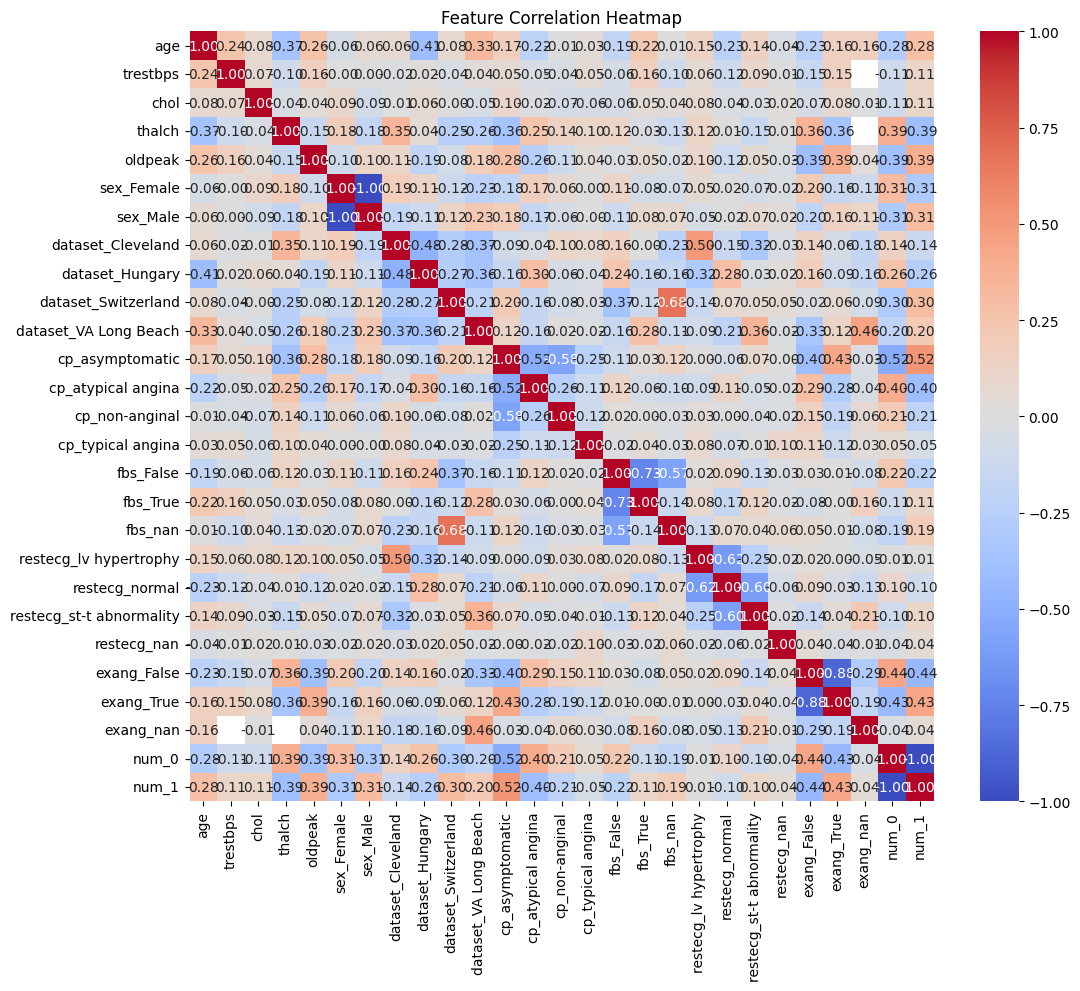

In [117]:

dataset_columns = [col for col in df.columns if col.startswith('dataset')]

correlation_matrix = df.corr()

# Create the heatmap
plt.figure(figsize=(12, 10))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


In [118]:

# Create a table with only data from Cleveland
cleveland_df = df[df['dataset_Cleveland'] == 1]

# Create a table with only data from Hungary
hungary_df = df[df['dataset_Hungary'] == 1]

# Create a table with only data from Switzerland
switzerland_df = df[df['dataset_Switzerland'] == 1]

# Create a table with only data from VA Long Beach
va_long_beach_df = df[df['dataset_VA Long Beach'] == 1]

# Print the table
cleveland_df = cleveland_df.drop(columns=dataset_columns)
hungary_df = hungary_df.drop(columns=dataset_columns)
switzerland_df = switzerland_df.drop(columns=dataset_columns)
va_long_beach_df = va_long_beach_df.drop(columns=dataset_columns)

cleveland_df.head()



,age,trestbps,chol,thalch,oldpeak,sex_Female,sex_Male,cp_asymptomatic,cp_atypical angina,cp_non-anginal,...,fbs_nan,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,restecg_nan,exang_False,exang_True,exang_nan,num_0,num_1
0,1.007386,0.675287,-0.263324,0.480653,1.303159,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1.432034,1.462483,0.745591,-1.140262,0.569611,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,1.432034,-0.636705,-0.339469,-0.329805,1.578239,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,-1.752828,-0.111908,0.060290,1.908602,2.403480,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,-1.328180,-0.111908,-0.815372,1.329704,0.477918,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


0.8032786885245902


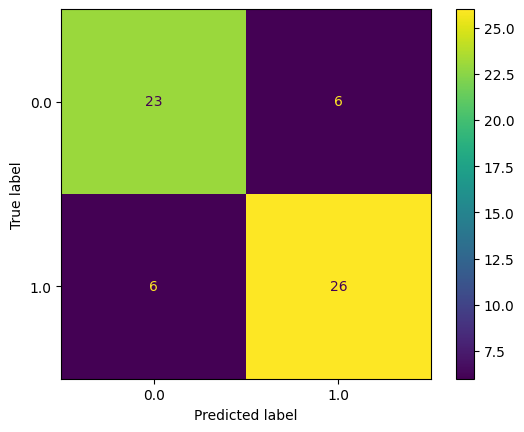

In [119]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
cleveland_df = pd.DataFrame(imputer.fit_transform(cleveland_df), columns=cleveland_df.columns)
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
cleveland_df = pd.DataFrame(imputer.fit_transform(cleveland_df), columns=cleveland_df.columns)

X = cleveland_df.iloc[:,:21]
y = cleveland_df.iloc[:,-2] # Correct way to select the last column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
print(accuracy_score(y_test, y_pred))

In [98]:
switzerland_df = pd.DataFrame(imputer.fit_transform(switzerland_df), columns=switzerland_df.columns)
hungary_df = pd.DataFrame(imputer.fit_transform(hungary_df), columns=hungary_df.columns)
va_long_beach_df = pd.DataFrame(imputer.fit_transform(va_long_beach_df), columns=va_long_beach_df.columns)

swiss_y_test = switzerland_df.iloc[:,-2]
hung_y_test = hungary_df.iloc[:,-2]
va_y_test = va_long_beach_df.iloc[:,-2]

swiss_X_test = switzerland_df.iloc[:,:21]
hung_X_test = hungary_df.iloc[:,:21]
va_X_test = va_long_beach_df.iloc[:,:21]



#swiss_X_train, swiss_X_test, swiss_y_train, swiss_y_test = train_test_split(swiss_X, swiss_y, test_size=0.2, random_state=42)
#hung_X_train, hung_X_test, hung_y_train, hung_y_test = train_test_split(hung_X, hung_y, test_size=0.2, random_state=42)
#va_X_train, va_X_test, va_y_train, va_y_test = train_test_split(va_X, va_y, test_size=0.2, random_state=42)


swiss_pred = model.predict(swiss_X_test)
hung_pred = model.predict(hung_X_test)
va_pred = model.predict(va_X_test)




Swiss Accuracy: 0.7804878048780488
Hungarian Accuracy: 0.8156996587030717
VA Accuracy: 0.76


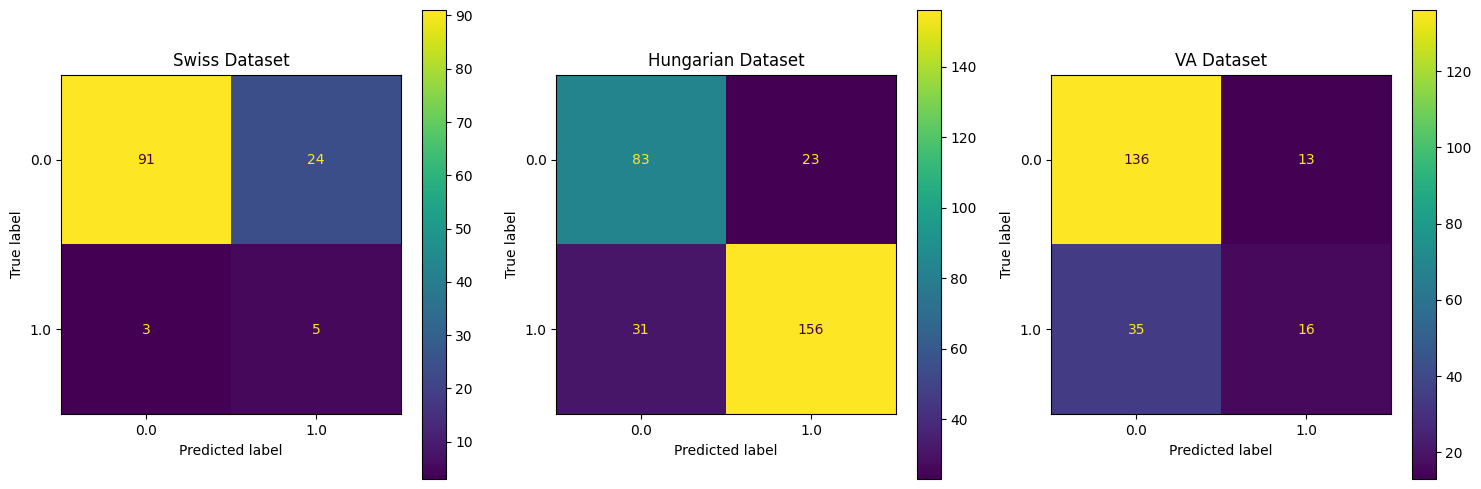

In [99]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Swiss dataset confusion matrix
ConfusionMatrixDisplay.from_estimator(model, swiss_X_test, swiss_y_test, ax=axes[0])
axes[0].set_title('Swiss Dataset')
print(f"Swiss Accuracy: {accuracy_score(swiss_y_test, swiss_pred)}")

# Hungarian dataset confusion matrix
ConfusionMatrixDisplay.from_estimator(model, hung_X_test, hung_y_test, ax=axes[1])
axes[1].set_title('Hungarian Dataset')
print(f"Hungarian Accuracy: {accuracy_score(hung_y_test, hung_pred)}")

# VA dataset confusion matrix
ConfusionMatrixDisplay.from_estimator(model, va_X_test, va_y_test, ax=axes[2])
axes[2].set_title('VA Dataset')
print(f"VA Accuracy: {accuracy_score(va_y_test, va_pred)}")

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [104]:
# prompt: I want the statistics of each feature used to predict in the model for each population.

from sklearn.metrics import classification_report

# Get the feature importance from the trained model (coefficients)
feature_importance = model.coef_[0]

# Create a DataFrame to store the feature importance
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Print the feature importance for the Cleveland dataset
print("Feature Importance for Cleveland Dataset:")
print(feature_importance_df)

# Get predictions and classification report for each population
def get_stats(X_test, y_test, population_name):
  y_pred = model.predict(X_test)
  report = classification_report(y_test, y_pred, output_dict=True)
  print(f"\nClassification Report for {population_name} Dataset:")
  print(pd.DataFrame(report).transpose())
  return y_pred

swiss_y_pred = get_stats(swiss_X_test, swiss_y_test, 'Swiss')
hung_y_pred = get_stats(hung_X_test, hung_y_test, 'Hungarian')
va_y_pred = get_stats(va_X_test, va_y_test, 'VA')
cle_y_pred = get_stats(X_test, y_test, 'Cleveland')

# You can further analyze the feature importance and classification reports for each population
# to understand how the model performs differently across different groups.

Feature Importance for Cleveland Dataset:
                     Feature  Importance
5                 sex_Female    0.884055
3                     thalch    0.644317
10         cp_typical angina    0.596163
9             cp_non-anginal    0.569969
18               exang_False    0.352177
16  restecg_st-t abnormality    0.129523
8         cp_atypical angina    0.113302
11                 fbs_False    0.048642
17               restecg_nan    0.000000
13                   fbs_nan    0.000000
20                 exang_nan    0.000000
15            restecg_normal   -0.040177
12                  fbs_True   -0.049333
14    restecg_lv hypertrophy   -0.090037
1                   trestbps   -0.274115
0                        age   -0.288624
19                exang_True   -0.352868
2                       chol   -0.420567
4                    oldpeak   -0.636079
6                   sex_Male   -0.884746
7            cp_asymptomatic   -1.280124

Classification Report for Swiss Dataset:
              